## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  

    3.1 O que é cada exemplo na base de dados?  
    3.2 Em que ano ela foi obtida?  
    3.3 Quem foram os responsáveis pela criação desta base de dados?  

In [2]:
## Reservado para a importação de bibliotecas
import os, psutil, warnings
warnings.filterwarnings("ignore")
print("CPUs:", psutil.cpu_count(logical=True))
os.environ["OMP_NUM_THREADS"] = str(psutil.cpu_count(logical=True))
os.environ["MKL_NUM_THREADS"] = str(psutil.cpu_count(logical=True))

import pandas as pd
import numpy as np

import kagglehub  # para baixar a base do Kaggle

import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades do sklearn para análise/validação
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pd.set_option("display.max_columns", 120)

CPUs: 2


1. Cada linha representa um pixel/área de 30 m × 30 m no norte do Colorado, com variáveis cartográficas (elevação, declividade, distâncias etc.) e o rótulo de tipo de cobertura florestal. A área do estudo inclui quatro áreas selvagens do Roosevelt National Forest.

2. A base foi doada ao UCI em 1998.

3. Os proprietários originais são do Remote Sensing and GIS Program – Colorado State University, com contatos: Jock A. Blackard e Dr. Denis J. Dean; como doadores constam Jock A. Blackard (USDA Forest Service), Dr. Denis J. Dean (CSU) e Dr. Charles W. Anderson (CSU).

### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

In [10]:
# === OBTENÇÃO E CARREGAMENTO DA BASE ===
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
df = pd.read_csv(path + "/covtype.csv")
print("Formato:", df.shape)
display(df.head(10))
display(df.tail(10))

Using Colab cache for faster access to the 'forest-cover-type-dataset' dataset.
Formato: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581002,2419,168,25,108,33,124,230,240,126,812,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581003,2415,161,25,95,29,120,236,237,116,815,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581004,2410,158,24,90,24,120,238,236,115,819,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581005,2405,159,22,90,19,120,237,238,119,824,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581006,2401,157,21,90,15,120,238,238,119,830,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [4]:
# === VISÃO GERAL ===
print("\nTipos de dados:")
display(df.dtypes.value_counts())

print("\nPresença de valores ausentes:")
display(df.isna().sum().sort_values(ascending=False).head(10))

print("\nDescrição estatística (numericos):")
display(df.describe())

print("\nColunas (primeiras 20):")
print(list(df.columns)[:20])


Tipos de dados:


,count
int64,55



Presença de valores ausentes:


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0



Descrição estatística (numericos):


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


Colunas (primeiras 20):
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6']


In [5]:
# === DETALHAMENTO DE ATRIBUTOS ===
numeric_cols = [c for c in df.columns if c not in ["Cover_Type"] and not c.startswith("Wilderness_Area") and not c.startswith("Soil_Type")]
cat_wilderness = [c for c in df.columns if c.startswith("Wilderness_Area")]
cat_soil = [c for c in df.columns if c.startswith("Soil_Type")]
target_col = "Cover_Type"

print("Atributo-alvo:", target_col)
print("Numéricos ({}):".format(len(numeric_cols)), numeric_cols)
print("Wilderness ({}):".format(len(cat_wilderness)), cat_wilderness[:8], "...")
print("Soil ({}):".format(len(cat_soil)), cat_soil[:8], "...")

# Distribuição do alvo
target_counts = df[target_col].value_counts().sort_index()
print("\nDistribuição do alvo (Cover_Type 1..7):")
display(target_counts)

# Balanceamento (proporções)
print("\nProporção por classe:")
display((target_counts / target_counts.sum()).round(4))

# Observações
print("\nObservação: Wilderness_Area_* e Soil_Type_* já estão codificados em One-Hot (variáveis dummy binárias).")

Atributo-alvo: Cover_Type
Numéricos (10): ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Wilderness (4): ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'] ...
Soil (40): ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8'] ...

Distribuição do alvo (Cover_Type 1..7):


,count
Cover_Type,
1,211840
2,283301
3,35754
4,2747
5,9493
6,17367
7,20510



Proporção por classe:


,count
Cover_Type,
1,0.3646
2,0.4876
3,0.0615
4,0.0047
5,0.0163
6,0.0299
7,0.0353



Observação: Wilderness_Area_* e Soil_Type_* já estão codificados em One-Hot (variáveis dummy binárias).


4) A base possui 581.012 instâncias (linhas).

5) São 54 atributos preditores + 1 alvo (55 colunas).
Numéricos (10): Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points.
Binários (4): Wilderness_Area1…4.
Binários (40): Soil_Type1…40.
Alvo: Cover_Type (inteiro 1–7).

6) Não há dados faltantes (checa-se com df.isna().sum() -> zero).

7) Soil_Type representa 40 classes nominais de tipo de solo da região estudada.
7.1) É qualitativo (nominal).
7.2) A codificação é one-hot encoding (cada classe vira uma coluna binária 0/1).

### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

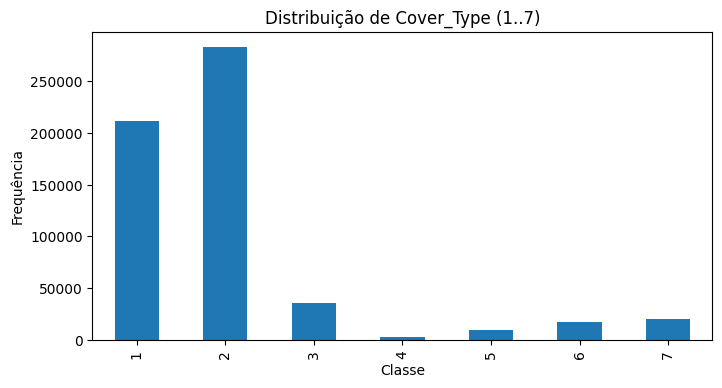

In [6]:
# === VISUALIZAÇÃO 1: Distribuição do alvo ===
fig, ax = plt.subplots(figsize=(8,4))
df["Cover_Type"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.set_title("Distribuição de Cover_Type (1..7)")
ax.set_xlabel("Classe")
ax.set_ylabel("Frequência")
plt.show()

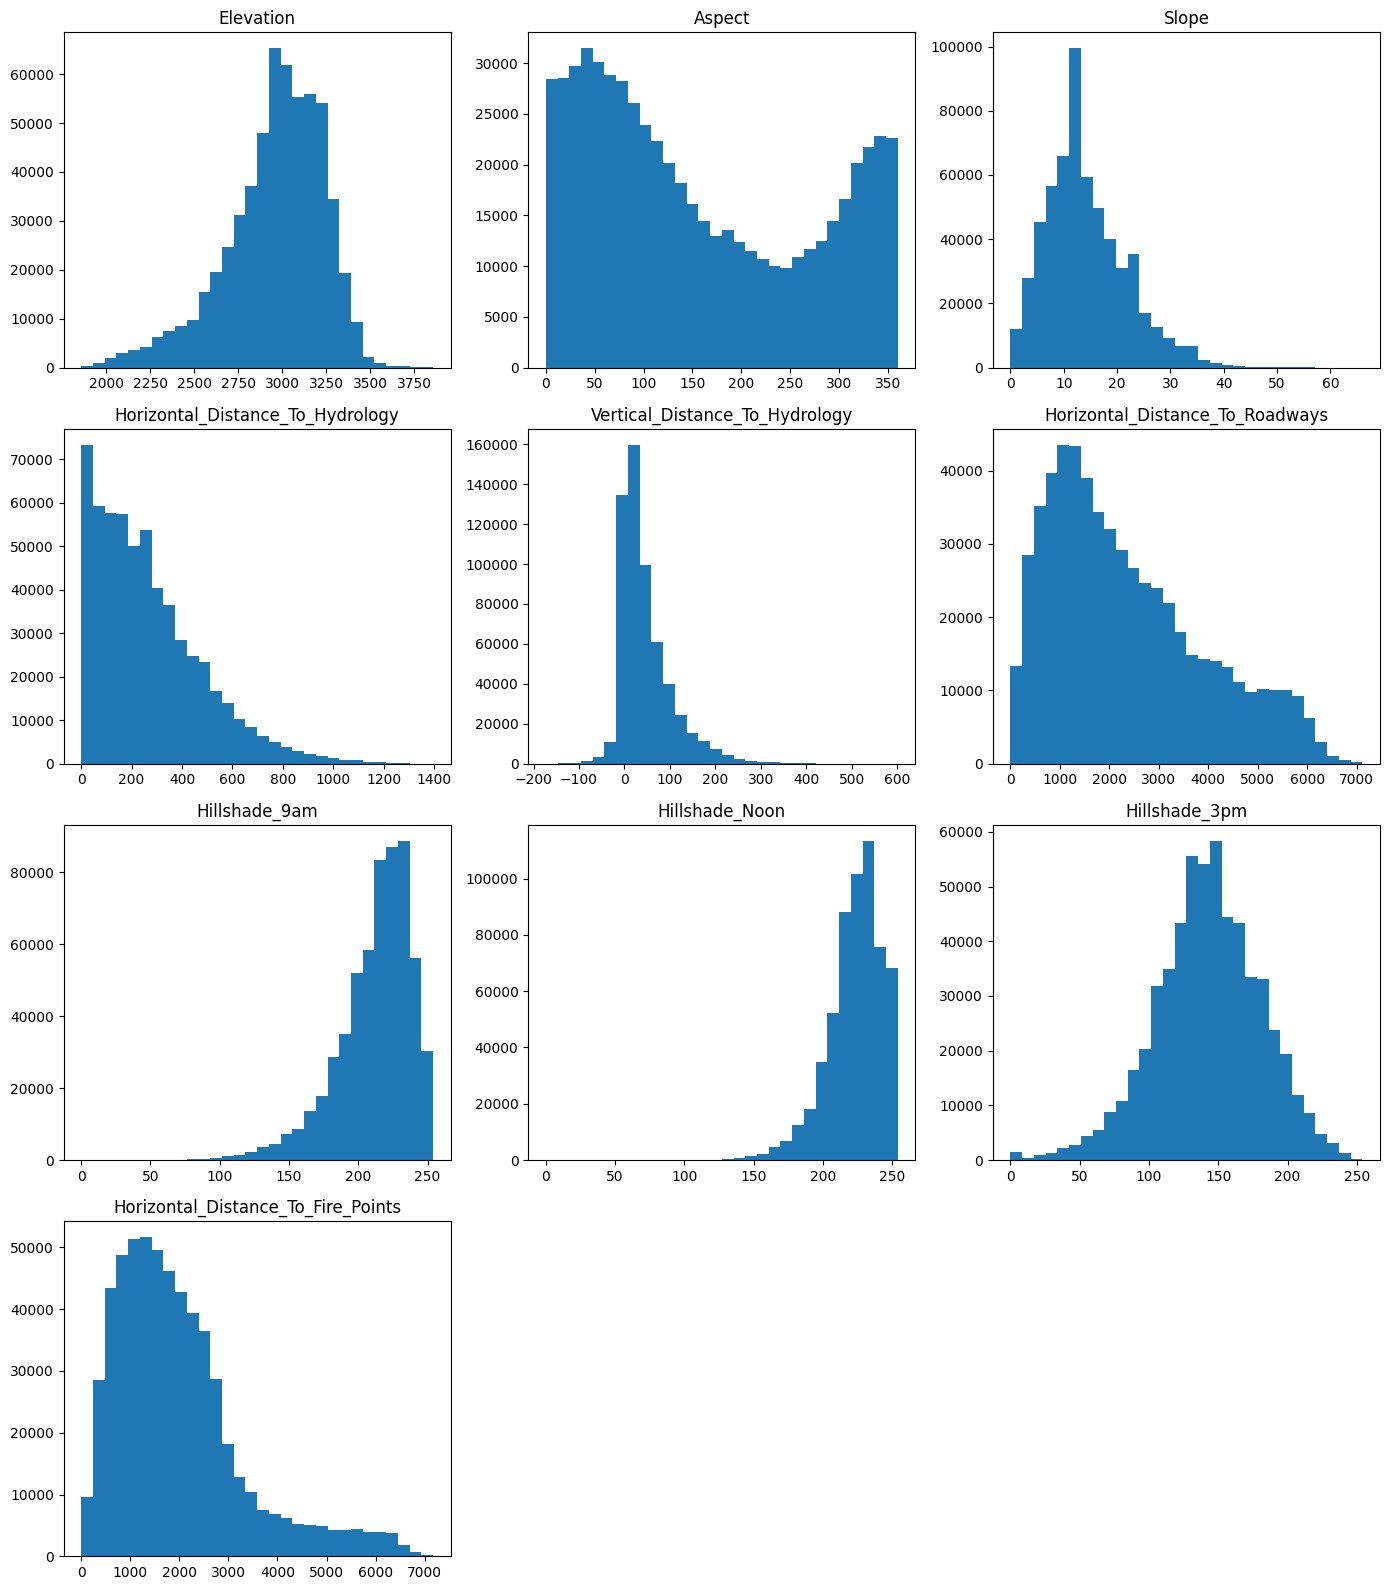

In [7]:
# === VISUALIZAÇÃO 2: Histogramas dos atributos numéricos ===
numeric_cols = [c for c in df.columns if c not in ["Cover_Type"] and not c.startswith("Wilderness_Area") and not c.startswith("Soil_Type")]
n = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
# Apaga eixos vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

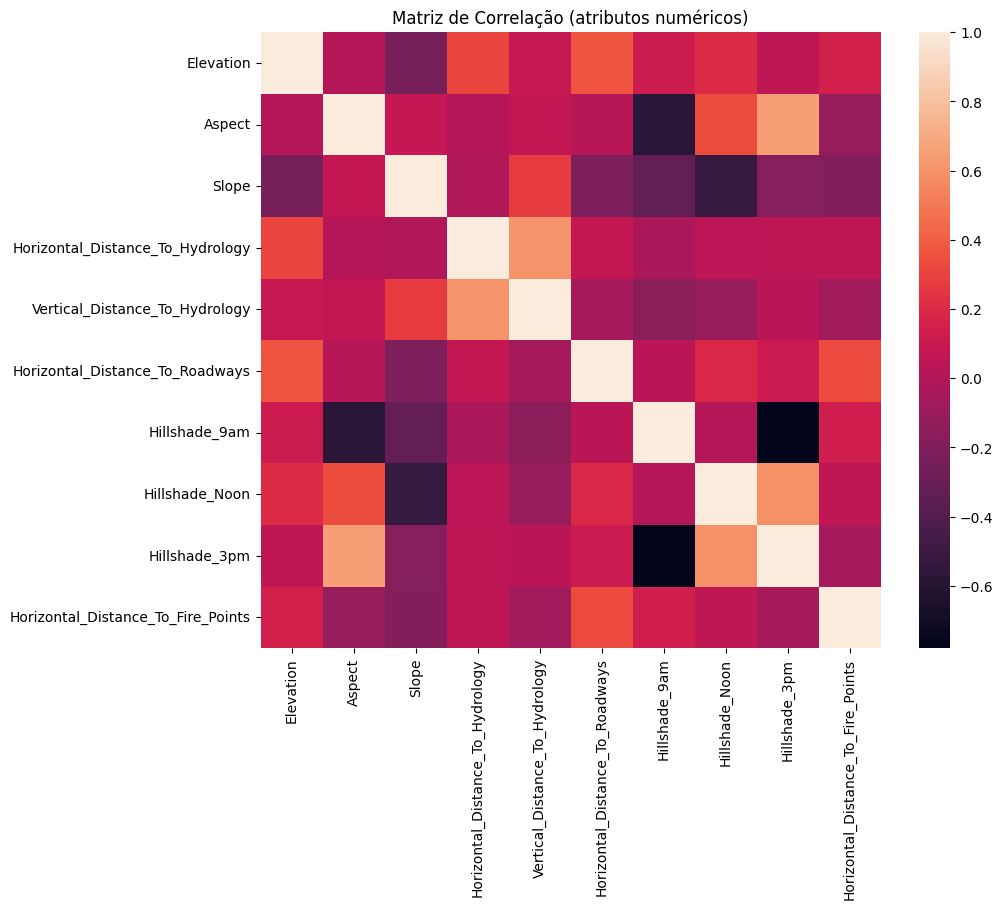

In [8]:
# === VISUALIZAÇÃO 3: Heatmap de correlação (numéricos) ===
numeric_cols = [c for c in df.columns if c not in ["Cover_Type"] and not c.startswith("Wilderness_Area") and not c.startswith("Soil_Type")]
corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, ax=ax, annot=False)
ax.set_title("Matriz de Correlação (atributos numéricos)")
plt.show()

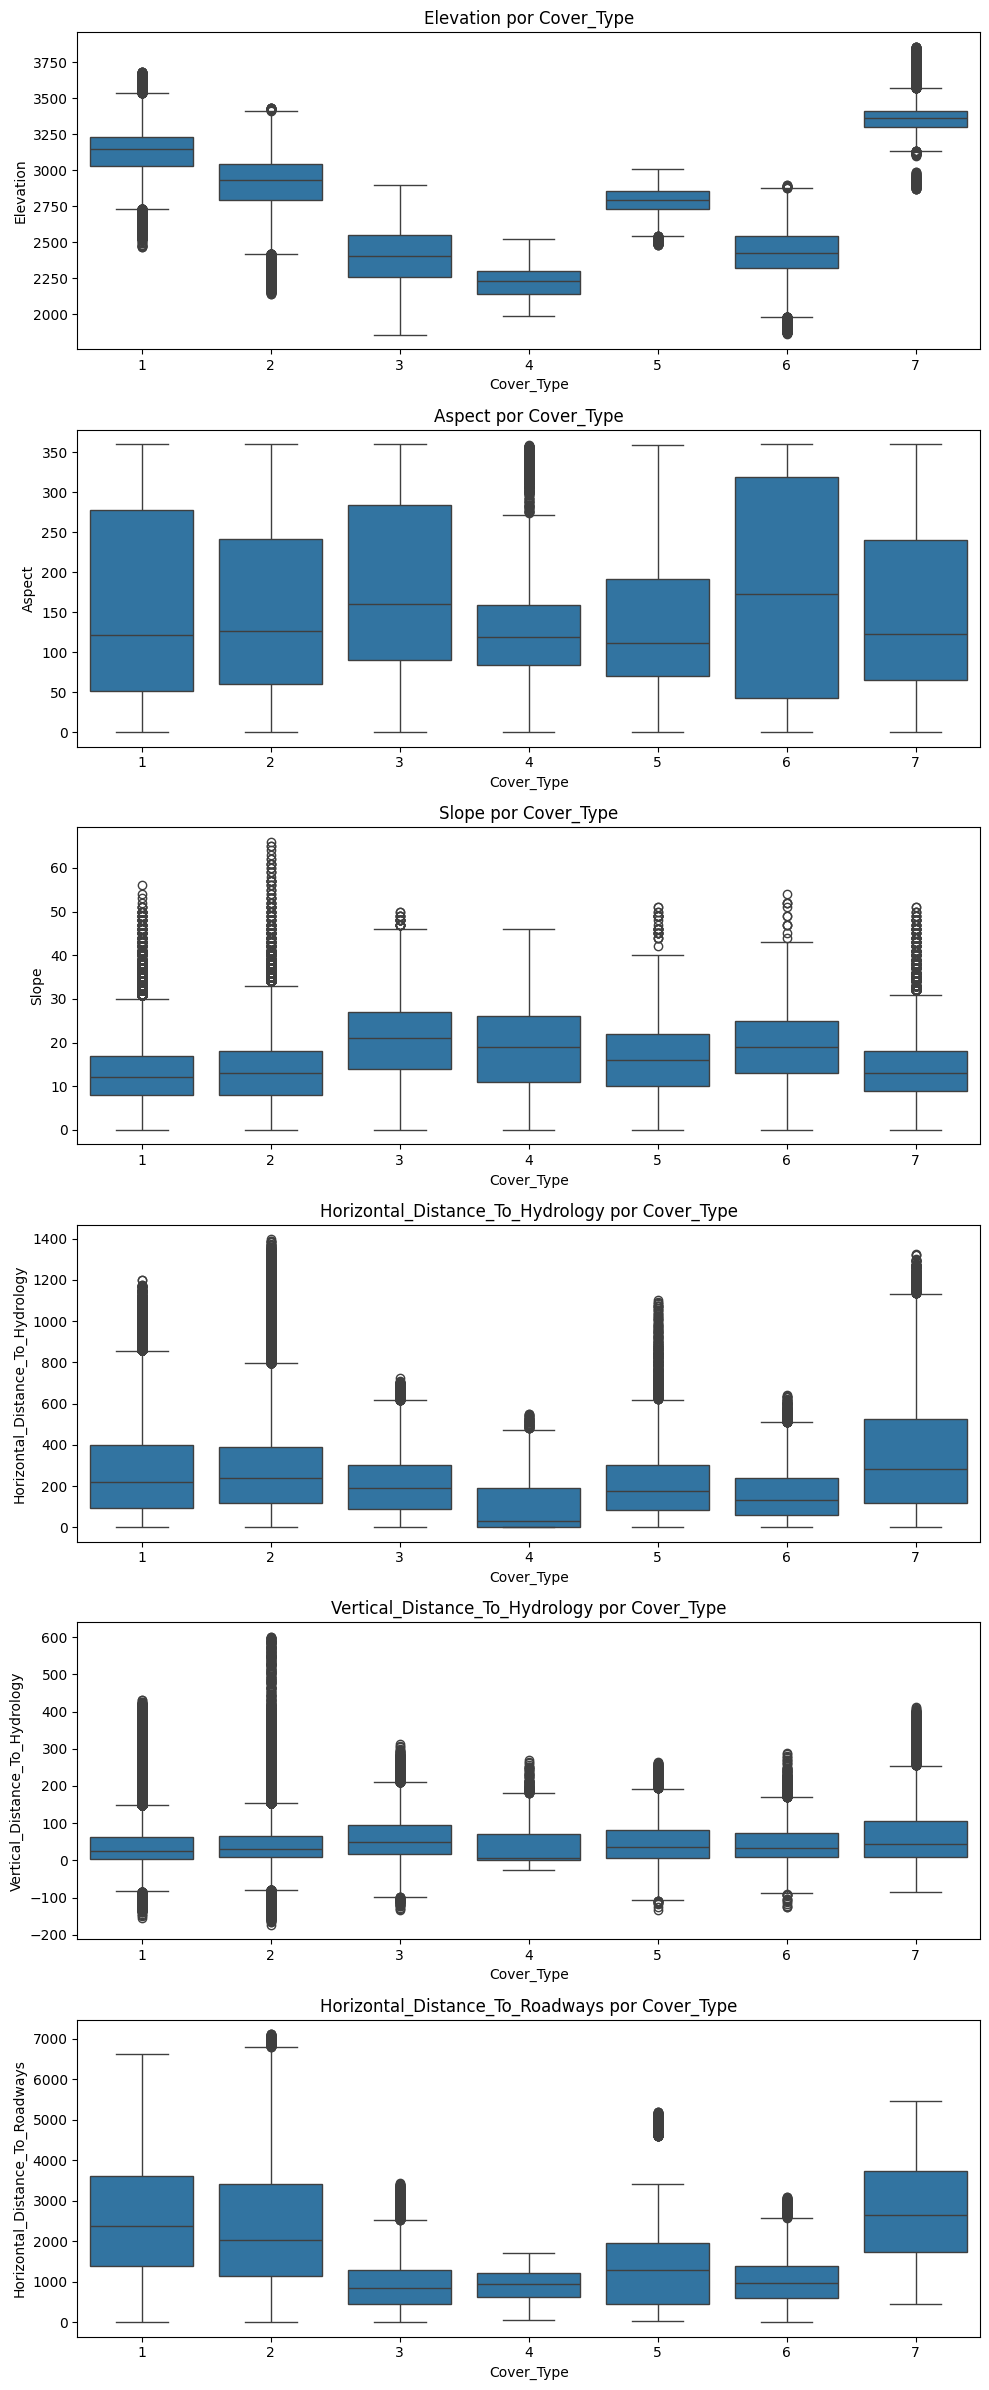

In [9]:
# === VISUALIZAÇÃO 4 (opcional): Boxplots por classe para alguns atributos ===
subset = numeric_cols[:6] if len(numeric_cols) > 6 else numeric_cols
fig, axes = plt.subplots(len(subset), 1, figsize=(10, 4*len(subset)))
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])
for ax, col in zip(axes, subset):
    sns.boxplot(data=df, x="Cover_Type", y=col, ax=ax)
    ax.set_title(f"{col} por Cover_Type")
plt.tight_layout()
plt.show()

3) O problema é de classificação supervisionada multiclasse (7 classes), pois cada exemplo é rotulado com um valor de Cover_Type de 1 a 7.

3.1) Métricas compatíveis:
* Acurácia (overall)
* Precisão, Recall e F1 por classe; macro e weighted
* Balanced Accuracy (média dos recalls por classe)
* Matriz de confusão
* Kappa de Cohen
* Log-loss / Cross-entropy (se o modelo fornecer probabilidades)
* ROC-AUC / PR-AUC (one-vs-rest); macro/weighted

3.2) F1-macro. Justificativa: trata todas as classes de forma igual (média não ponderada do F1 por classe), reduzindo o viés das classes majoritárias num cenário desbalanceado. Recomenda-se reportar também Balanced Accuracy e a Matriz de Confusão para diagnóstico.